In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpy as np
from scipy.special import erf
import sys
sys.path.append('./../figures/')
from makeCorner import *

## KDE Likelihood, $\epsilon=0.03$

First, load the output of our inference as an arviz InferenceData object:

In [2]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0300.cdf")
az.summary(data)

mean      sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
bq                    1.582   0.904   0.012    3.205      0.013    0.011   
logit_zeta_spike     -0.227   1.072  -2.329    1.618      0.021    0.016   
logsig_chi           -1.019   0.186  -1.416   -0.715      0.003    0.003   
min_log_neff          2.008   0.472   1.201    2.670      0.008    0.005   
mu_chi                0.107   0.050   0.024    0.199      0.001    0.001   
nEff_inj_per_event  113.664  21.664  77.267  157.888      0.335    0.237   
zeta_spike            0.463   0.205   0.078    0.821      0.004    0.003   

                    ess_bulk  ess_tail  r_hat  
bq                    5874.0    3725.0    1.0  
logit_zeta_spike      2852.0    2681.0    1.0  
logsig_chi            3109.0    1921.0    1.0  
min_log_neff          3957.0    3656.0    1.0  
mu_chi                3085.0    2843.0    1.0  
nEff_inj_per_event    3956.0    4227.0    1.0  
zeta_spike            2852.0    2681.0    1.0

The contents of this file are the following:

| Parameter | Description |
| :-------- | :---------- |
| `mu_chi` | Mean of the $\chi_\mathrm{eff}$ distribution |
| `logsig_chi` | Log10 of the standard deviation of the $\chi_\mathrm{eff}$ distribution |
| `zeta_spike` | Mixture of BBHs in the delta-function at $\chi_\mathrm{eff}=0$ |
| `logit_zeta_spike` | Intermediate parameter; for efficiency, our code samples in $\mathrm{logit}(\zeta_\mathrm{spike})$ rather than $\zeta_\mathrm{spike}$ itself |
| `bq` | Power-law index on the conditional secondary mass distribution $p(m_2\|m_1)$|
| `min_log_neff` | Log10 of the minimum number of effective samples (taken across events) for the proposed hyperparameter |
| `nEff_inj_per_event` | The effective number of found injections per observed event at the proposed hyperparameter (should be $\gg 4$) |

Next, plot our various chains to inspect convergence:

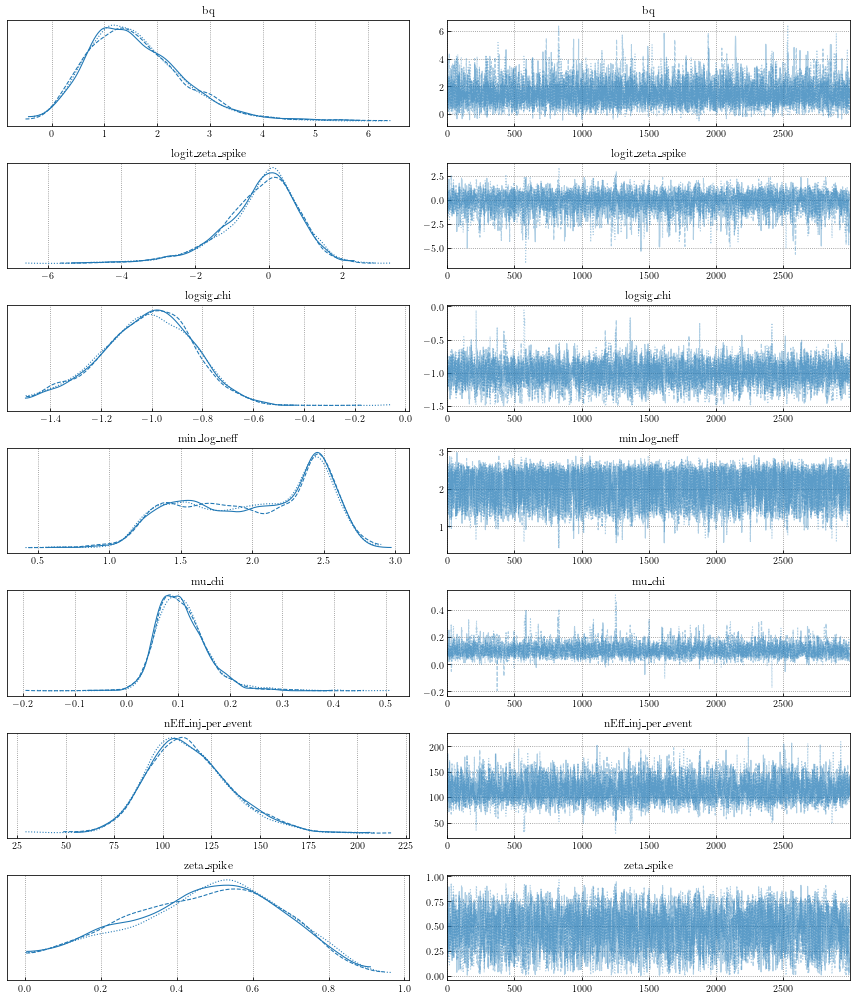

In [3]:
az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

Let's make a corner plot showing posteriors on our parameters:

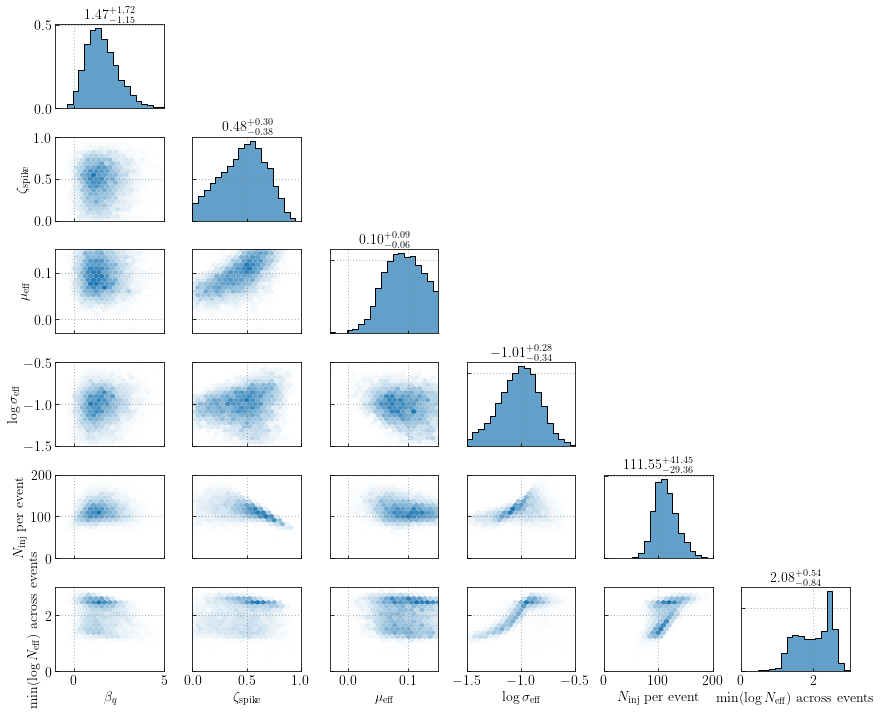

In [4]:
fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

In exactly the same way, check diagnostic plots for the other runs.

## KDE Likelihood, $\epsilon=0.01$

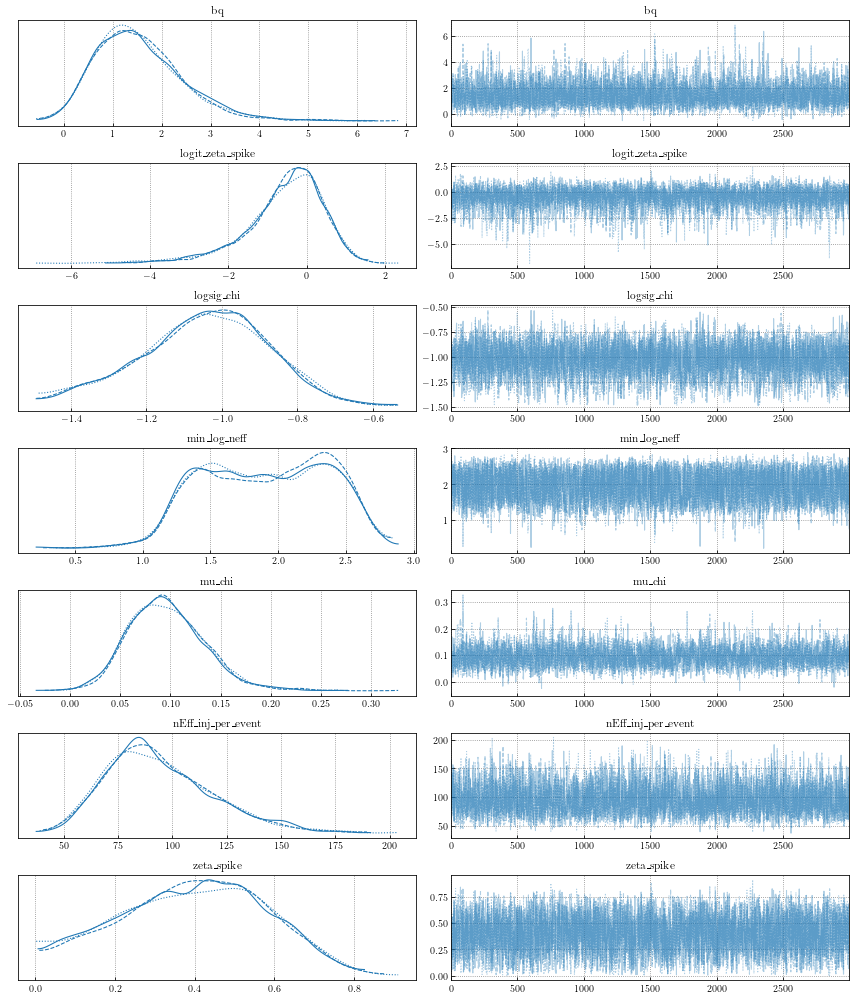

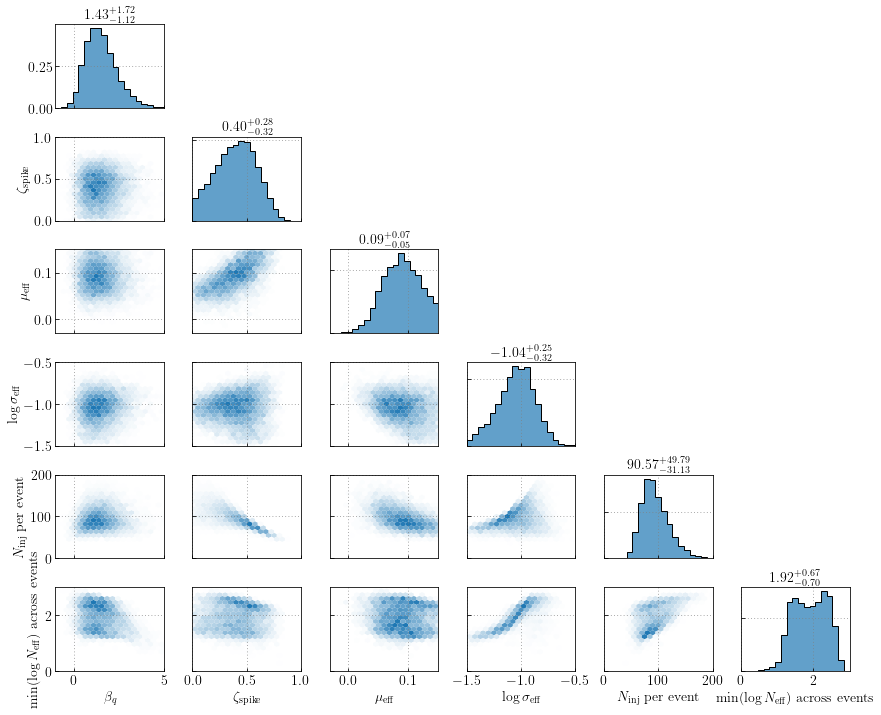

In [5]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0100.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## KDE Likelihood, $\epsilon=0.003$

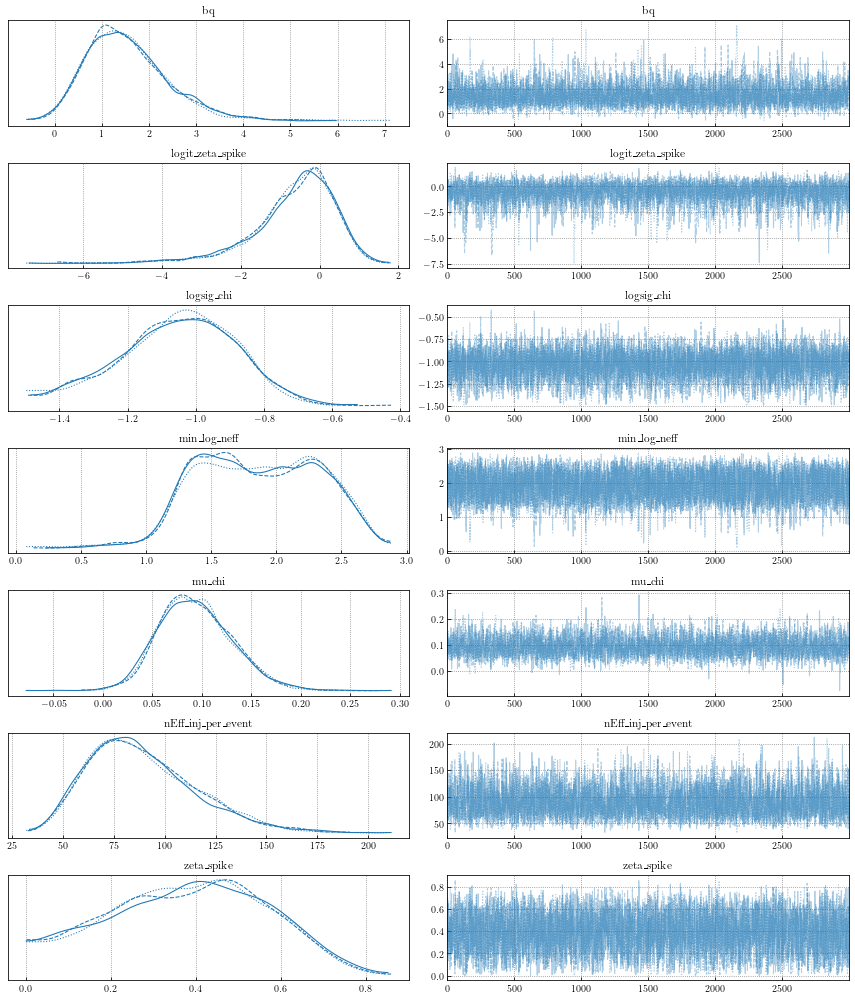

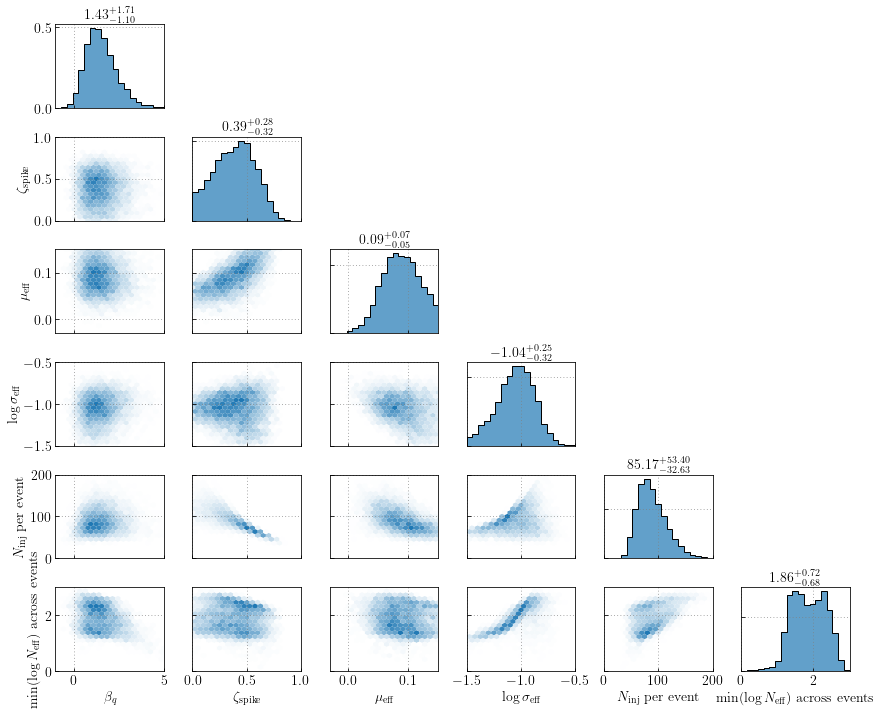

In [6]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0030.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## KDE Likelihood, $\epsilon=0.001$

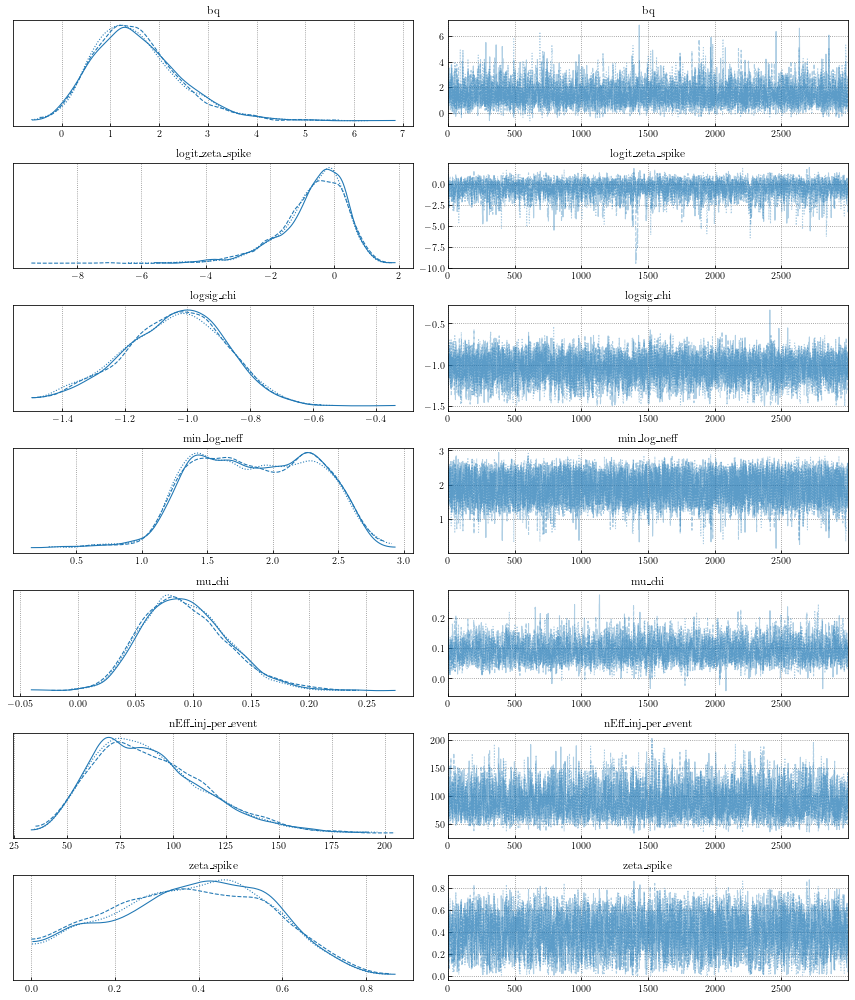

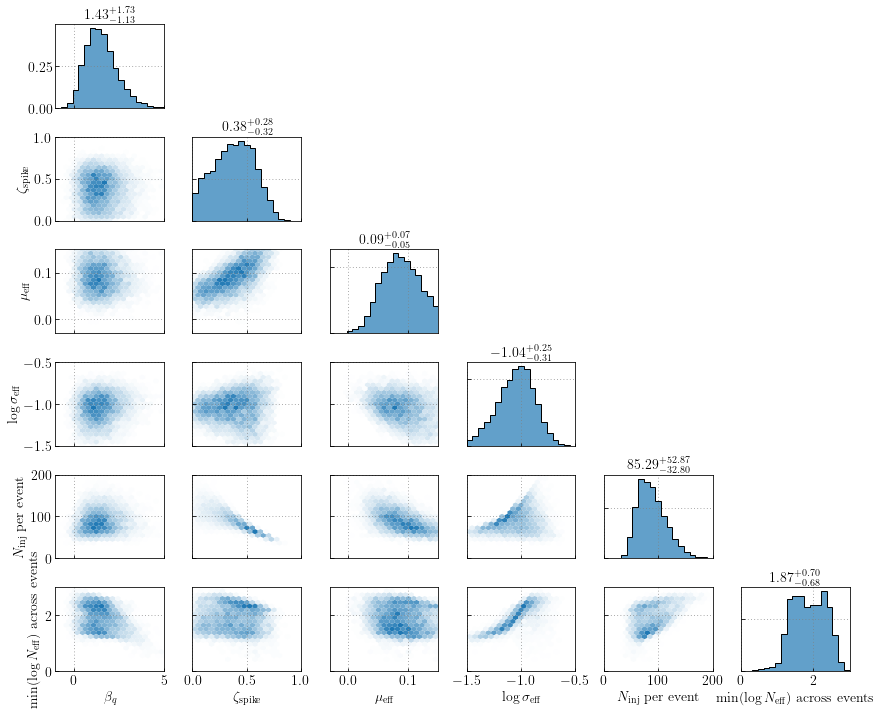

In [7]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0010.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## KDE Likelihood, $\epsilon=0.0003$

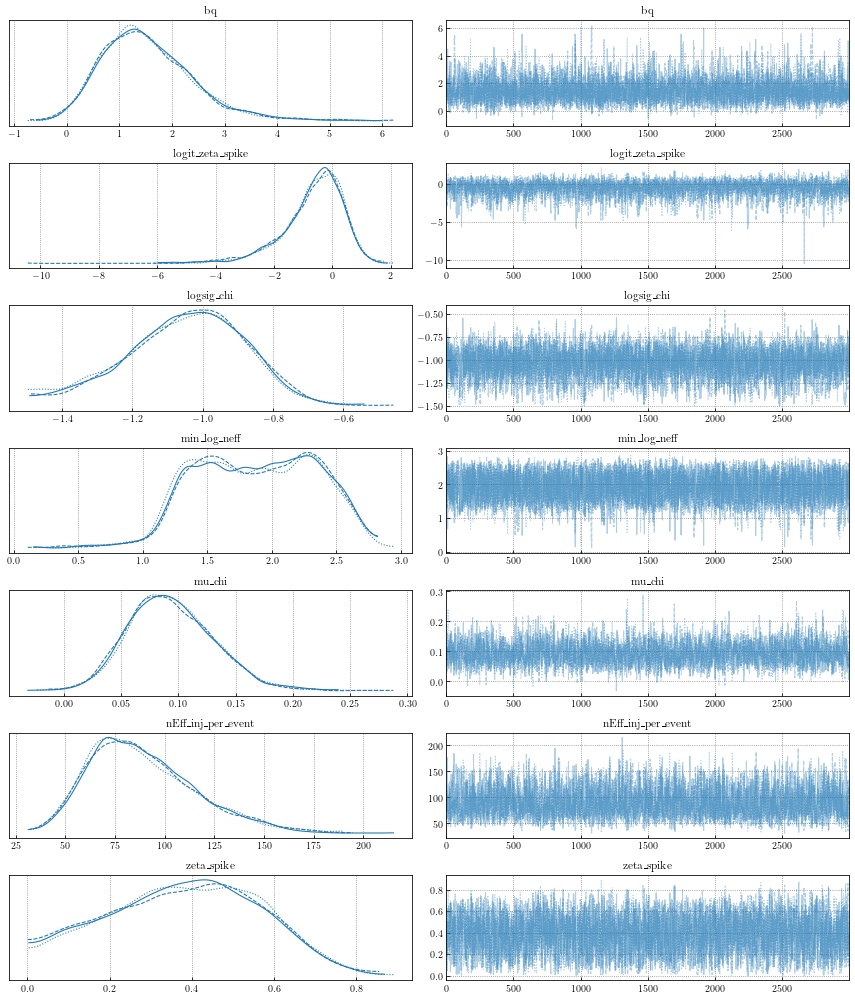

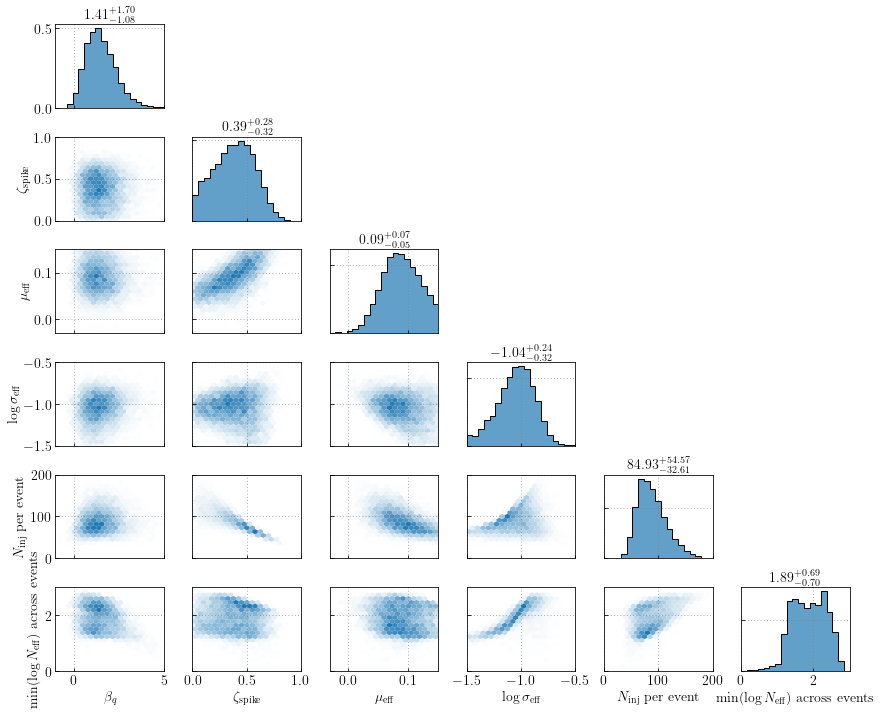

In [8]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0003.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## KDE Likelihood, $\epsilon=0.0001$

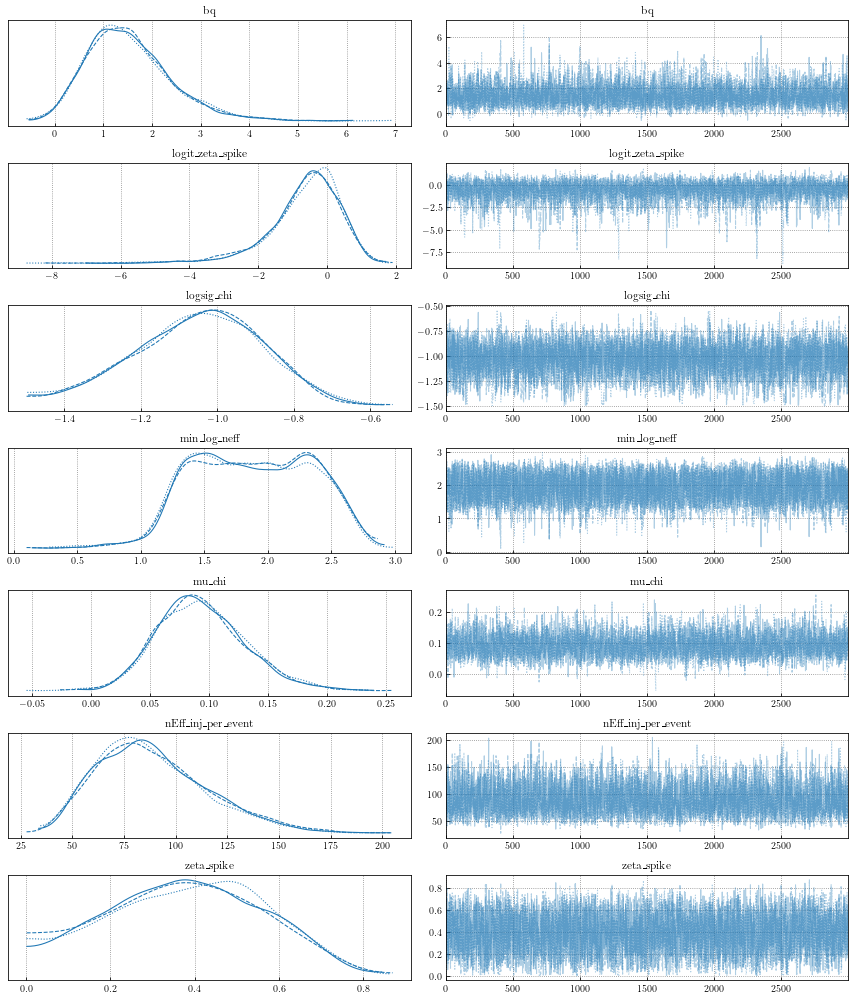

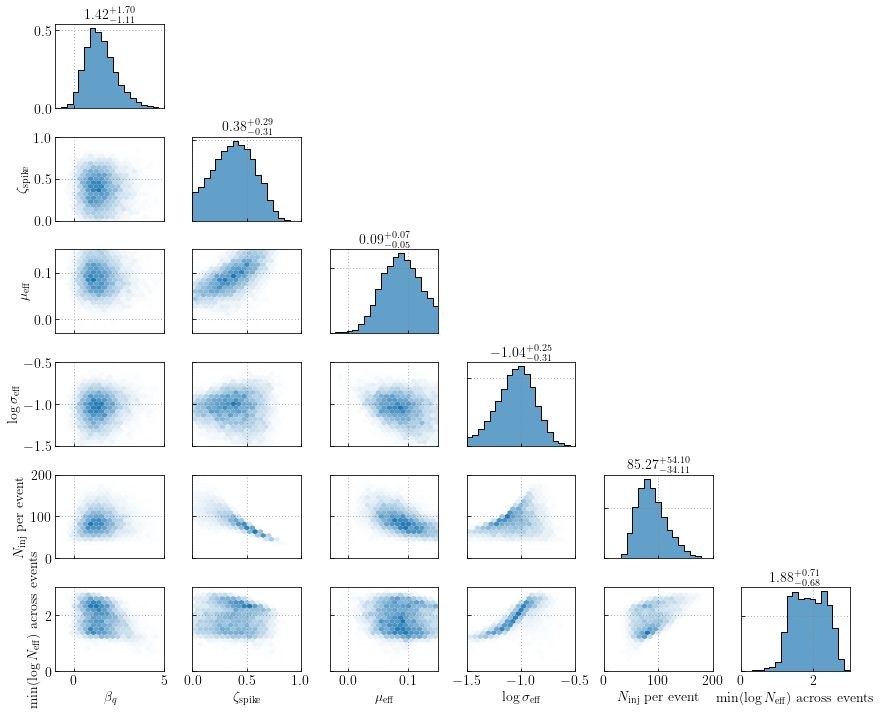

In [9]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_kde_eps_0.0001.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged Likelihood, $\epsilon=0.03$

Similarly plot results using likelihood with Monte Carlo averages over samples and injections. Note that, as $\epsilon$ shrinks, our posteriors will vary erratically and our measures of convergence ($N_\mathrm{inj}$ per event and $\min(\log N_\mathrm{eff})$) will shift towards zero.

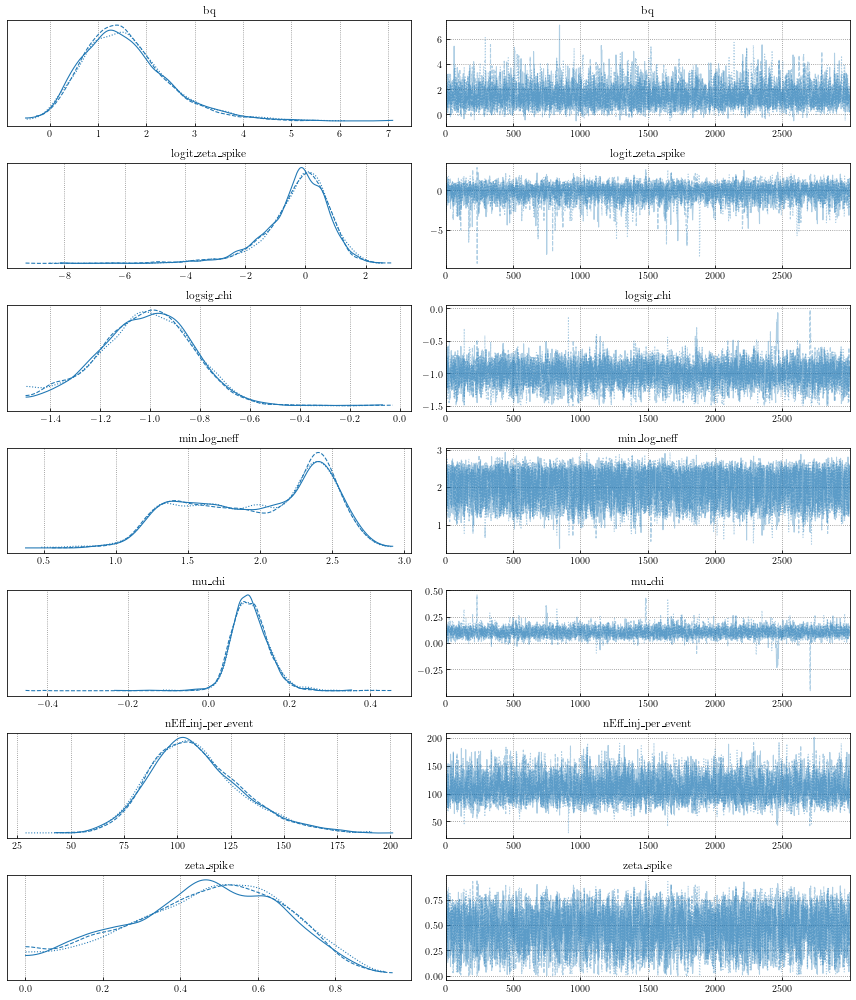

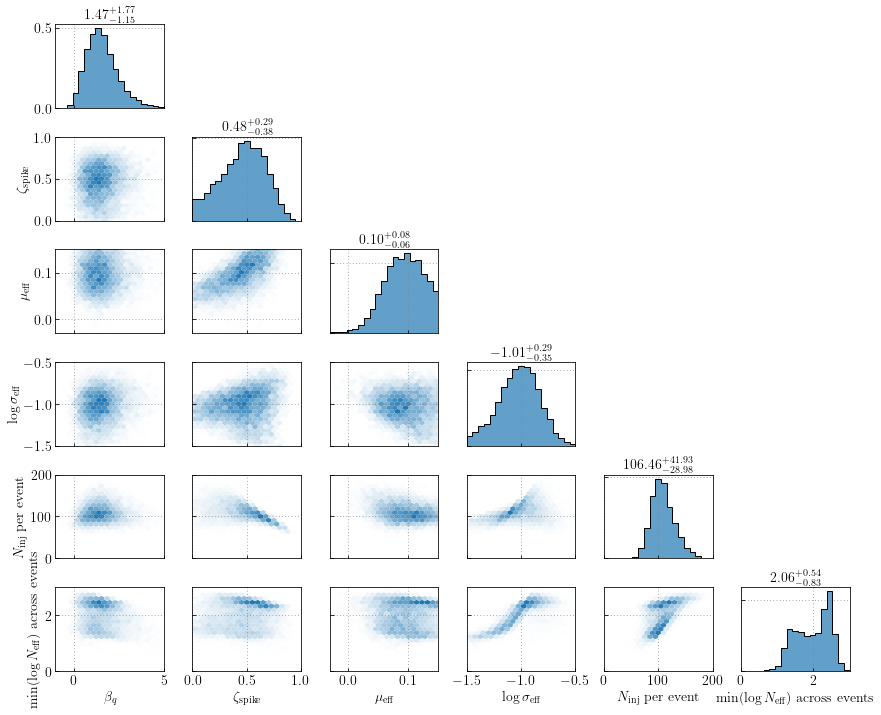

In [10]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0300.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged, $\epsilon=0.01$

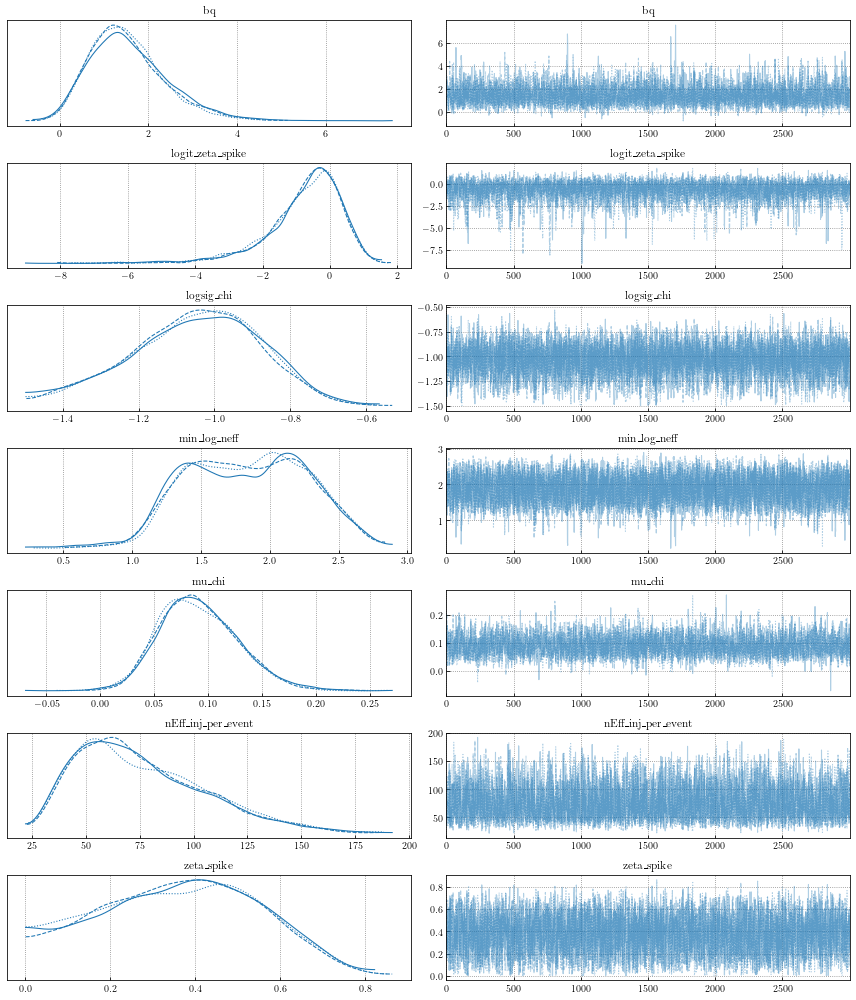

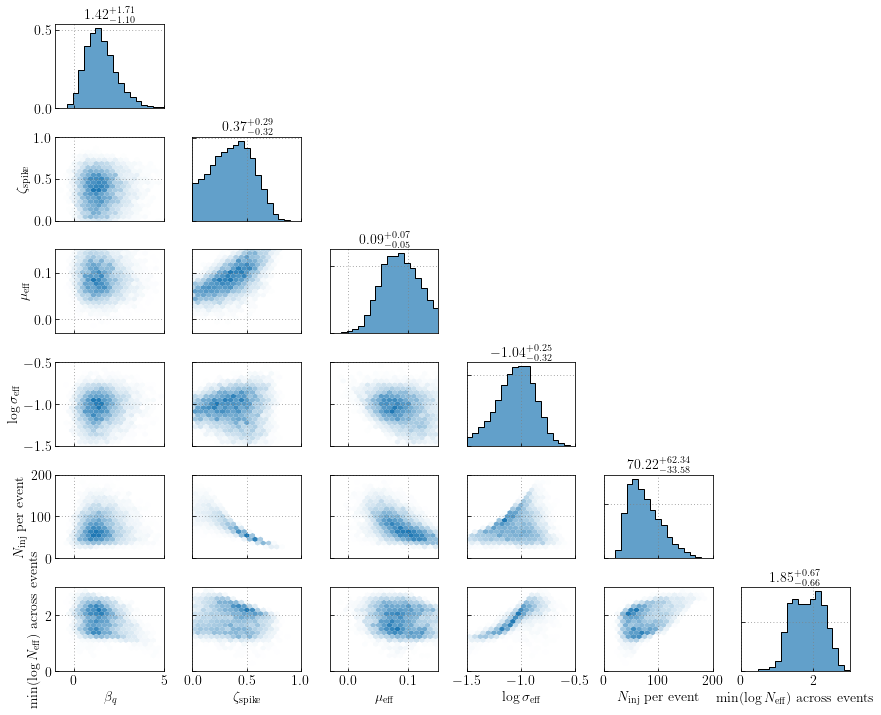

In [11]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0100.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged Likelihood, $\epsilon=0.003$

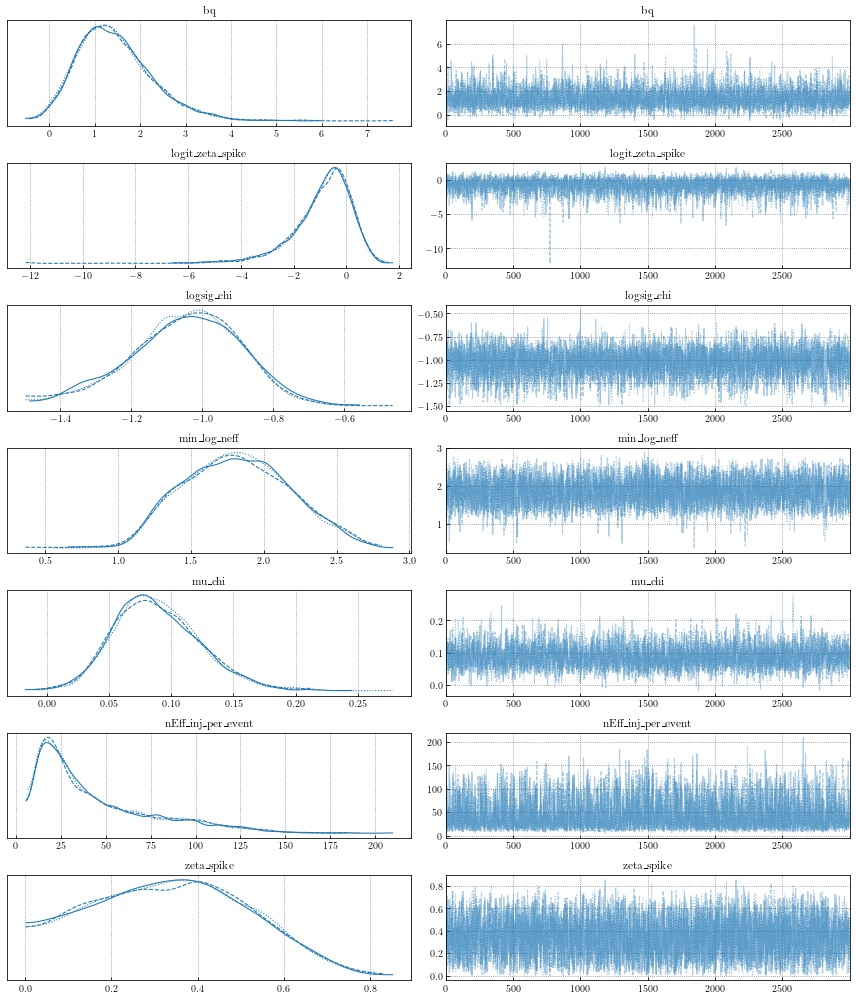

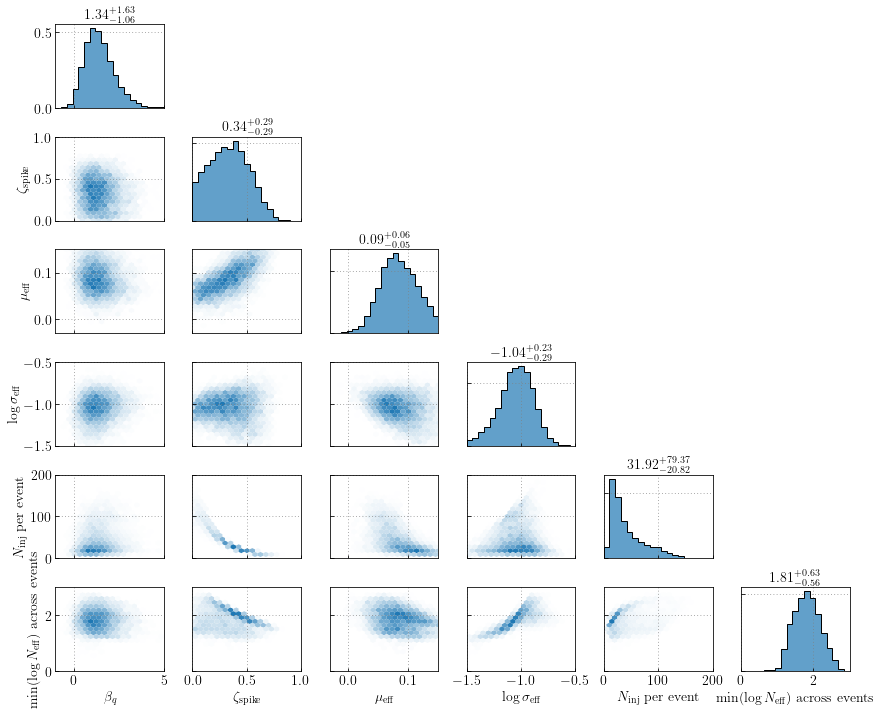

In [12]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0030.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged Likelihood, $\epsilon=0.001$

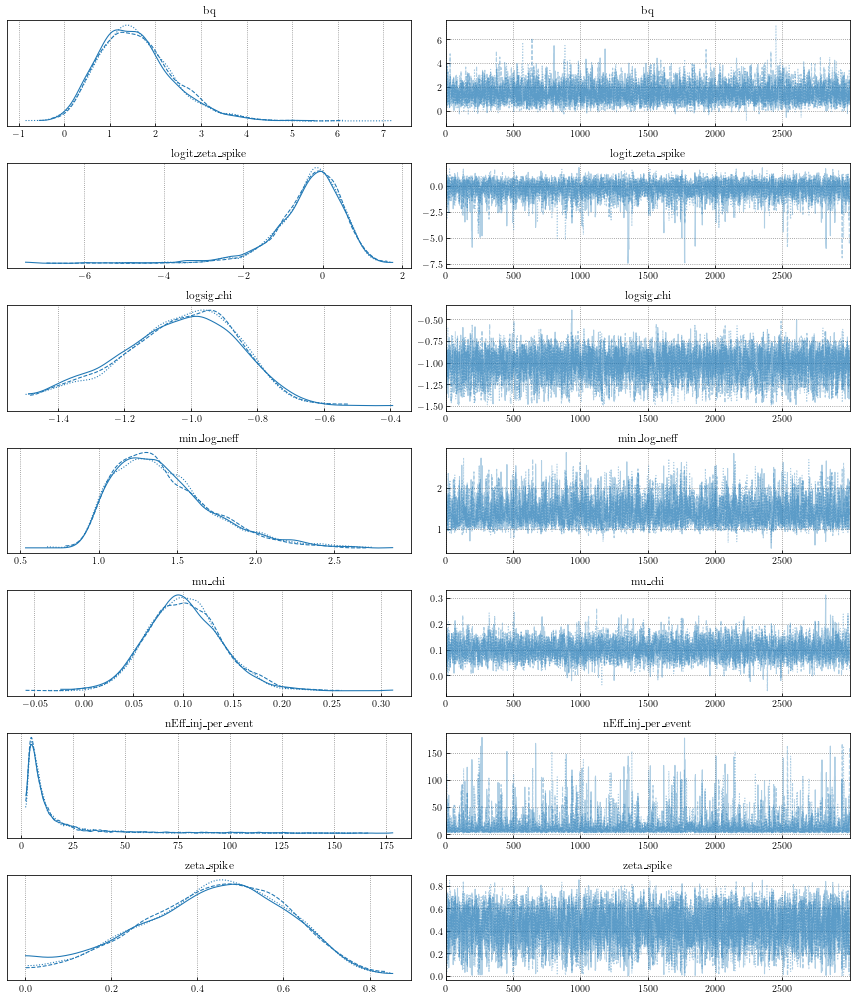

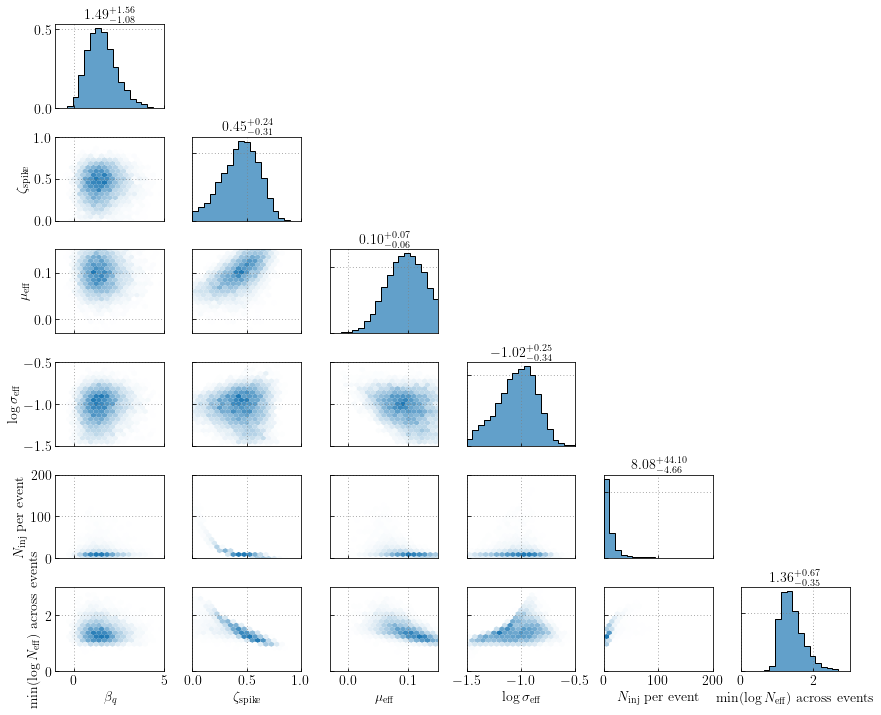

In [13]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0010.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged Likelihood, $\epsilon=0.0003$

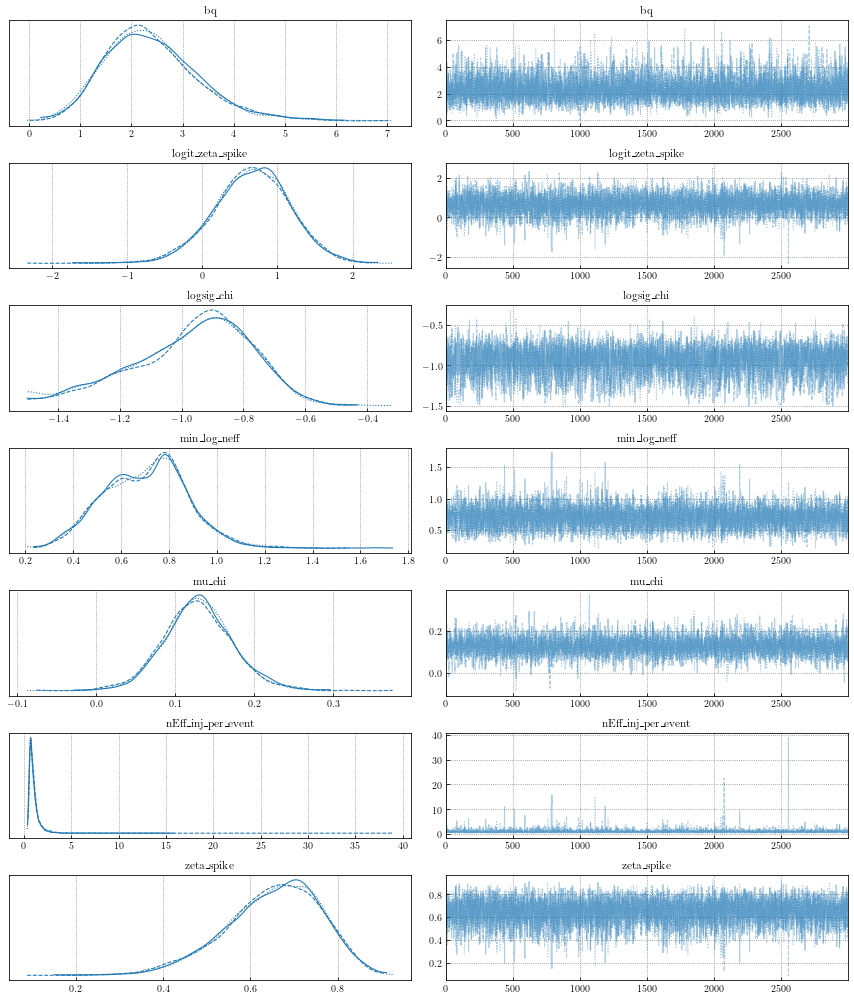

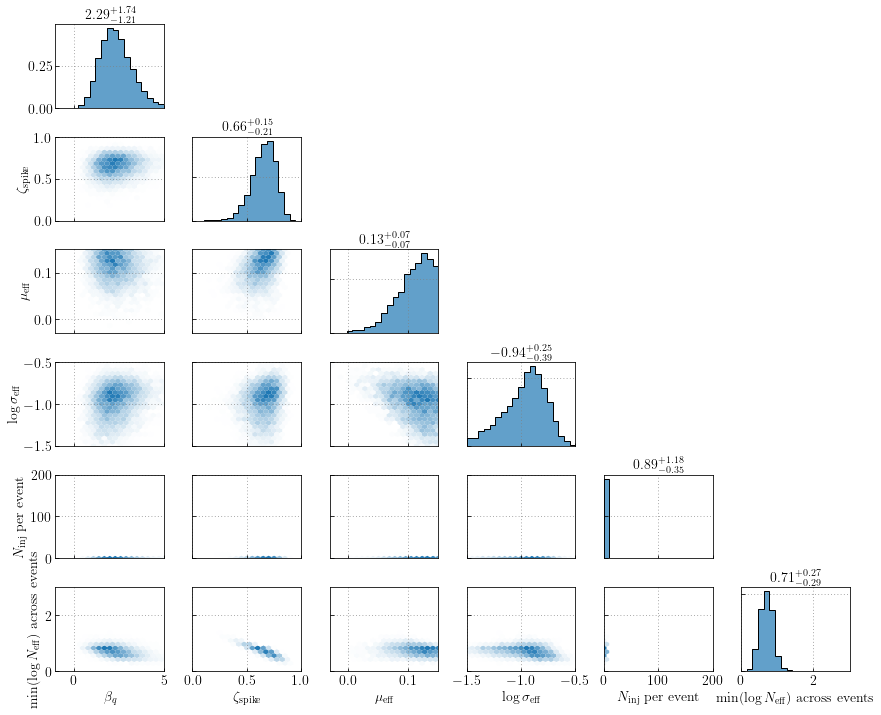

In [14]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0003.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()

## Monte Carlo Averaged Likelihood, $\epsilon=0.0001$

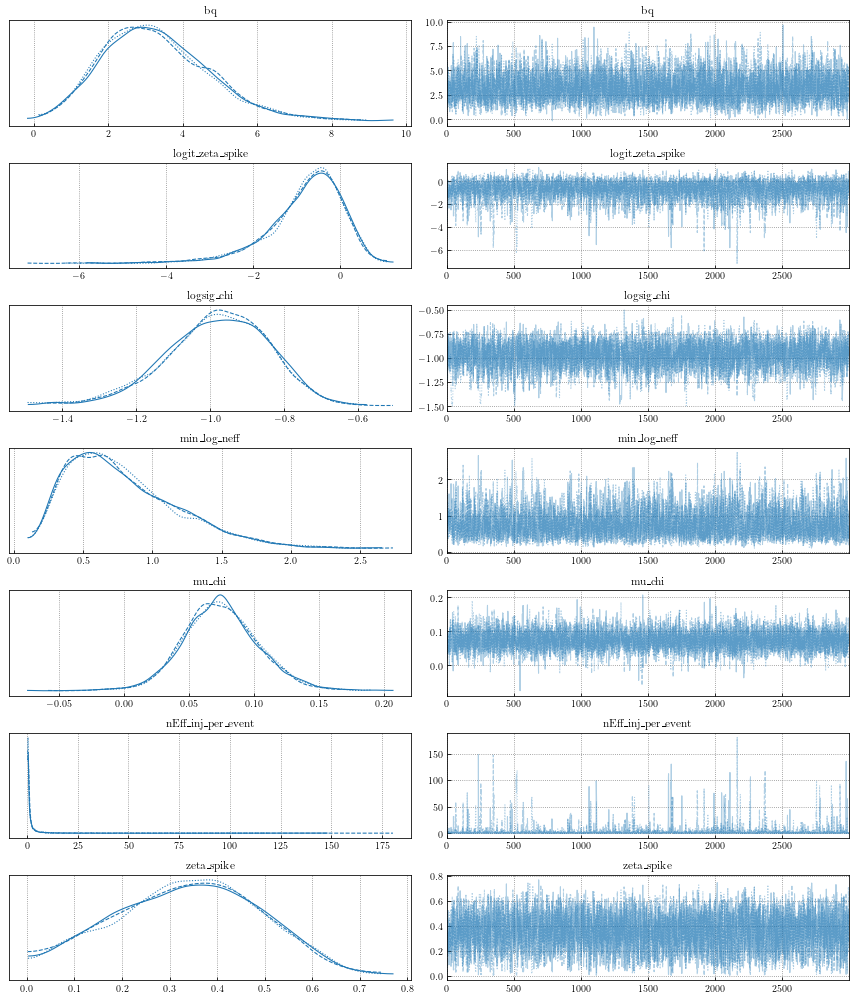

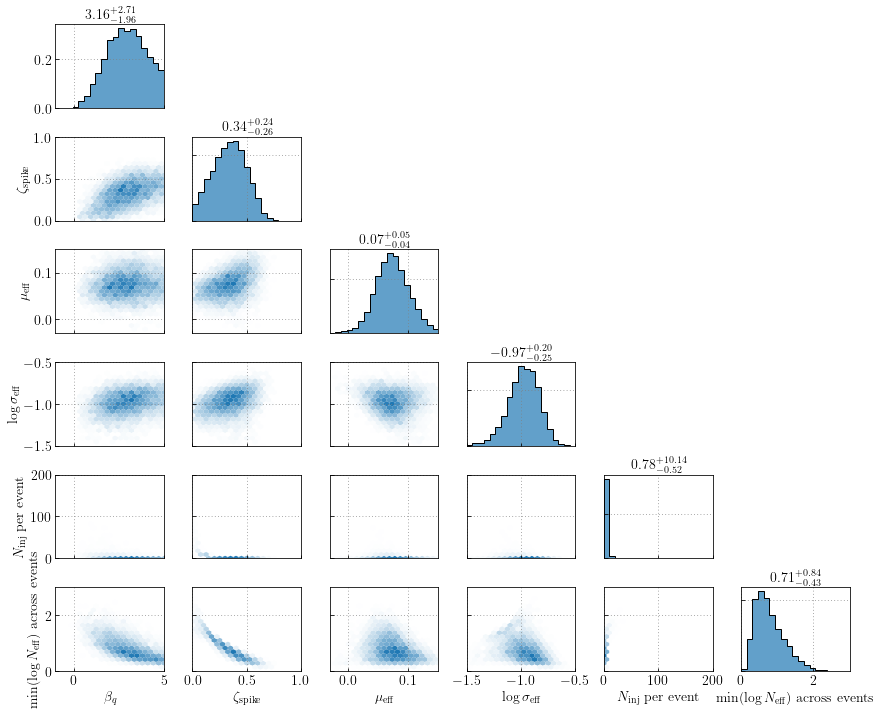

In [15]:
data = az.from_netcdf("kde_vs_monteCarlo_comparisons/effective_spin_gaussian_spike_mc_eps_0.0001.cdf")
az.summary(data)

az.plot_trace(data, compact=True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12,10))

stacked_samples = data.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "bq":{"data":stacked_samples.bq,"plot_bounds":(-1,5),"label":r"$\beta_q$"},
    "zeta_spike":{"data":stacked_samples.zeta_spike,"plot_bounds":(0,1),"label":r"$\zeta_\mathrm{spike}$"},
    "mu_chi":{"data":stacked_samples.mu_chi,"plot_bounds":(-0.03,0.15),"label":r"$\mu_\mathrm{eff}$"},
    "logsig":{"data":stacked_samples.logsig_chi,"plot_bounds":(-1.5,-0.5),"label":r"$\log\sigma_\mathrm{eff}$"},
    "neff_inj_per_event":{"data":stacked_samples.nEff_inj_per_event,"plot_bounds":(0,200),"label":r"$N_\mathrm{inj}$ per event"},
    "min_log_neff":{"data":stacked_samples.min_log_neff,"plot_bounds":(0,3),"label":r"$\min(\log N_\mathrm{eff})$ across events"}
}

plot_corner(fig,toPlot,'#1f78b4')
plt.tight_layout()
plt.show()